<a href="https://colab.research.google.com/github/harvardnlp/pytorch-struct/blob/master/notebooks/Sparse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Banded Sparse Matrices for PyTorch 

Working in deep learning for NLP a common statement I often hear from students is that "dense operations are fast / sparse are slow". With the exception of convolutions most of the operations we do in NLP, roughly take the form of dense matrix-matrix (i.e. attention) or matrix-vector multiplies (i.e. RNN, output embeddings). 

Part of this though is just that these are the operations people have taken the time to optimize on CUDA and come built into libraries. There are a lot of sparse matrix strategies that run really fast on GPU. 

In this notebook I show the implementation of one class of sparse matrix: https://en.wikipedia.org/wiki/Band_matrix

In [2]:
import torch
import matplotlib.pyplot as plt
!pip install -qU git+https://github.com/harvardnlp/genbmm
import genbmm

In [0]:
def show(bm):
    bm = bm
    plt.tight_layout()
    fig = plt.figure()
    fig.set_figheight(5)
    fig.set_figwidth(5) 
    a = fig.add_subplot(1,2,2)
    plt.imshow(bm.to_dense().cpu().detach()[0], vmin=0, vmax=1)
    plt.axis('off')

    fig.set_figheight(5)
    fig.set_figwidth(10) 
    a = fig.add_subplot(1,2,1)
    plt.imshow(bm.data.cpu().detach()[0], vmin=0, vmax=1)
    plt.axis('off')

In [0]:
base = torch.arange(1, 21).view(1, 20, 1).expand(1, 20, 4).cuda() / 21.0
bm = genbmm.BandedMatrix(base, 2, 1)

<Figure size 432x288 with 0 Axes>

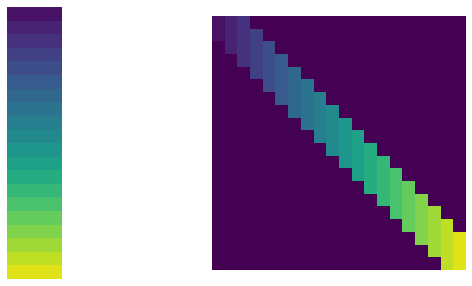

In [35]:
show(bm)

<Figure size 432x288 with 0 Axes>

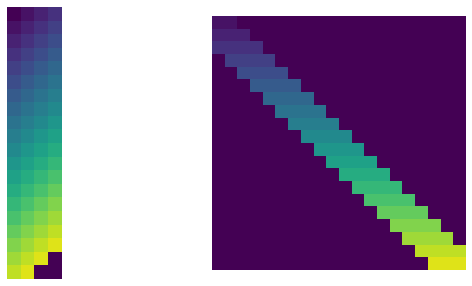

In [36]:
show(bm.transpose())

<Figure size 432x288 with 0 Axes>

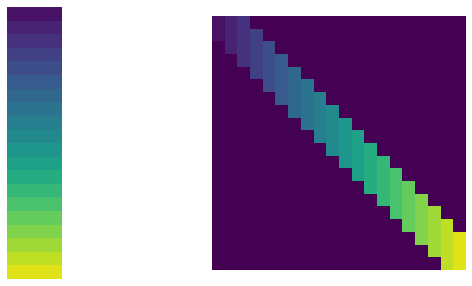

In [40]:
show(bm.op(bm, lambda a,b : (a + b) / 2))

<Figure size 432x288 with 0 Axes>

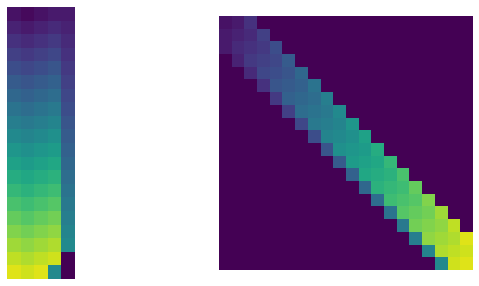

In [41]:
show(bm.op(bm.transpose(), lambda a,b : (a + b) / 2))

<Figure size 432x288 with 0 Axes>

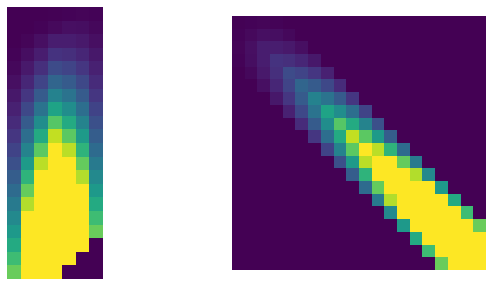

In [42]:
show(bm.multiply(bm))

<Figure size 432x288 with 0 Axes>

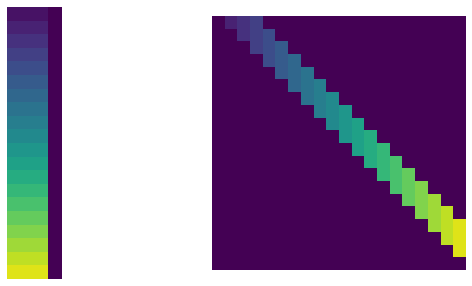

In [47]:
show(bm.band_shift(1))

<Figure size 432x288 with 0 Axes>

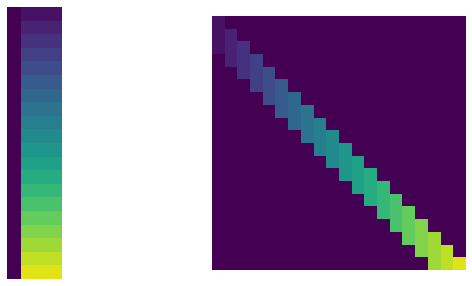

In [48]:
show(bm.band_shift(-1))

<Figure size 432x288 with 0 Axes>

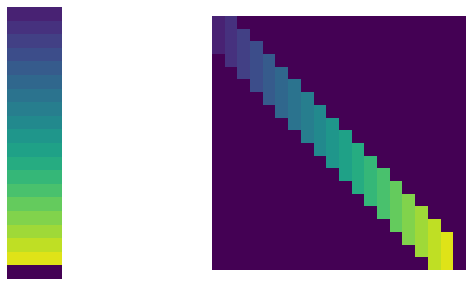

In [50]:
show(bm.col_shift(1))

<Figure size 432x288 with 0 Axes>

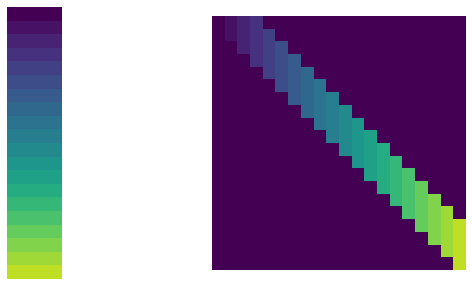

In [51]:
show(bm.col_shift(-1))

<Figure size 432x288 with 0 Axes>

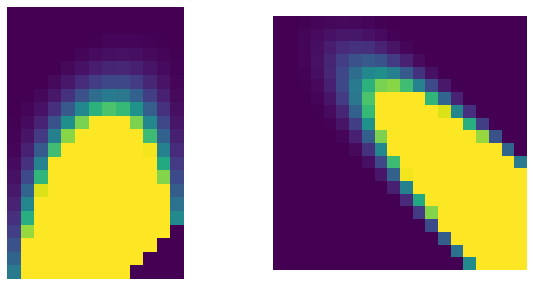

In [57]:
show(bm.multiply(bm.transpose()).multiply(bm.transpose()).multiply(bm.transpose()))

<Figure size 432x288 with 0 Axes>

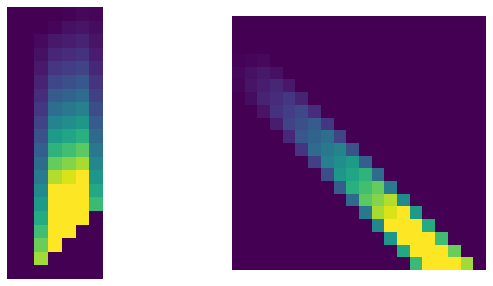

In [55]:
show(bm.multiply(bm.band_shift(1).band_shift(1)))

There are a lot of fun applications of this style of banded matrix. In my library PyTorch-Struct we use them for very fast computation of sequence alignnments.

In [0]:
!pip install -qU git+https://github.com/harvardnlp/pytorch-struct

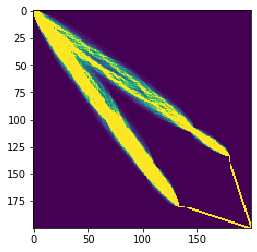

In [94]:
import torch_struct
vals = torch.rand(1, 200, 200, 3).cuda()
vals[0, 180:, :] = 1e6
vals[0, :, 180:] = 1e6
q = torch_struct.Alignment(torch_struct.LogSemiring).marginals(vals.cuda())
plt.imshow(q[0].cpu().detach()[...].sum(-1), vmin=0, vmax=1.0)